# VGGNet

## 1. Environment Setup

### 1.0. Check GPU

In [1]:
!nvidia-smi

Sat Jun 20 18:22:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64       Driver Version: 440.64       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN Xp            Off  | 00000000:17:00.0 Off |                  N/A |
|  0%   32C    P2   156W / 250W |   1173MiB / 12196MiB |     33%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN Xp            Off  | 00000000:65:00.0 Off |                  N/A |
|  0%   36C    P5    13W / 250W |   4555MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

### 1.1. Install Pytorch and torchvision

In [2]:
# Install pytorch and torchvision
!pip install --default-timeout=1000 torch torchvision

You should consider upgrading via the 'pip install --upgrade pip' command.


### 1.2. Install matplotlib

In [3]:
!pip install --default-timeout=1000 matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.


### 1.3. Import

In [4]:
import train

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

## 2. Data Preprocessing

In [5]:
batch_size = 256

In [6]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trainset = torchvision.datasets.CIFAR10('./data/', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True)

testset = torchvision.datasets.CIFAR10('./data/', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


## 3. Train Model

In [7]:
depth = 16
batch_norm = True
num_classes = 10
pretrained = False

gpu_id = 1

start_epoch = 0
epochs = 400

lr = 0.01
momentum = 0.9
weight_decay = 0.0005

epoch_print = 20

# path to checkpoint
resume = False

In [8]:
vgg = train.VGGNet(depth=depth, batch_norm=batch_norm, num_classes=num_classes, 
                   gpu_id=gpu_id, epoch_print=epoch_print)

=> Create model with depth : 16, batch_norm : True


In [9]:
vgg.train(trainloader, testloader, resume=False, 
          start_epoch=start_epoch, epochs=epochs, 
          lr=lr, momentum=momentum, weight_decay=weight_decay)

Epoch 1 Started...
Iteration : 10 - Train Loss : 2.28, Test Loss : 2.30, Train Acc : 15.23, Test Acc : 11.43
Iteration : 20 - Train Loss : 2.30, Test Loss : 2.28, Train Acc : 8.20, Test Acc : 15.34
Iteration : 30 - Train Loss : 2.26, Test Loss : 2.20, Train Acc : 12.50, Test Acc : 17.54
Iteration : 40 - Train Loss : 2.07, Test Loss : 2.05, Train Acc : 20.70, Test Acc : 20.29
Iteration : 50 - Train Loss : 2.06, Test Loss : 1.96, Train Acc : 21.48, Test Acc : 25.29
Iteration : 60 - Train Loss : 1.97, Test Loss : 1.99, Train Acc : 22.27, Test Acc : 24.31
Iteration : 70 - Train Loss : 1.95, Test Loss : 1.89, Train Acc : 27.34, Test Acc : 26.66
Iteration : 80 - Train Loss : 1.93, Test Loss : 1.90, Train Acc : 22.27, Test Acc : 26.32
Iteration : 90 - Train Loss : 1.94, Test Loss : 1.84, Train Acc : 23.44, Test Acc : 31.09
Iteration : 100 - Train Loss : 1.88, Test Loss : 1.83, Train Acc : 26.56, Test Acc : 29.53
Iteration : 110 - Train Loss : 1.97, Test Loss : 1.77, Train Acc : 25.78, Test Ac

Iteration : 150 - Train Loss : 0.52, Test Loss : 0.45, Train Acc : 82.42, Test Acc : 86.36
Iteration : 160 - Train Loss : 0.57, Test Loss : 0.44, Train Acc : 78.52, Test Acc : 86.06
Iteration : 170 - Train Loss : 0.52, Test Loss : 0.40, Train Acc : 80.86, Test Acc : 87.60
Iteration : 180 - Train Loss : 0.47, Test Loss : 0.40, Train Acc : 84.77, Test Acc : 87.45
Iteration : 190 - Train Loss : 0.48, Test Loss : 0.42, Train Acc : 81.25, Test Acc : 87.23
Epoch 101 Started...
Iteration : 10 - Train Loss : 0.42, Test Loss : 0.50, Train Acc : 85.55, Test Acc : 85.32
Iteration : 20 - Train Loss : 0.47, Test Loss : 0.42, Train Acc : 84.77, Test Acc : 87.10
Iteration : 30 - Train Loss : 0.69, Test Loss : 0.46, Train Acc : 76.17, Test Acc : 86.28
Iteration : 40 - Train Loss : 0.44, Test Loss : 0.43, Train Acc : 84.38, Test Acc : 87.33
Iteration : 50 - Train Loss : 0.43, Test Loss : 0.41, Train Acc : 83.98, Test Acc : 87.84
Iteration : 60 - Train Loss : 0.51, Test Loss : 0.39, Train Acc : 80.47, T

Iteration : 100 - Train Loss : 0.29, Test Loss : 0.38, Train Acc : 88.67, Test Acc : 90.35
Iteration : 110 - Train Loss : 0.29, Test Loss : 0.38, Train Acc : 89.06, Test Acc : 90.42
Iteration : 120 - Train Loss : 0.30, Test Loss : 0.40, Train Acc : 89.84, Test Acc : 90.03
Iteration : 130 - Train Loss : 0.26, Test Loss : 0.38, Train Acc : 89.06, Test Acc : 90.11
Iteration : 140 - Train Loss : 0.43, Test Loss : 0.38, Train Acc : 86.72, Test Acc : 90.31
Iteration : 150 - Train Loss : 0.26, Test Loss : 0.38, Train Acc : 92.19, Test Acc : 90.28
Iteration : 160 - Train Loss : 0.31, Test Loss : 0.38, Train Acc : 89.45, Test Acc : 90.38
Iteration : 170 - Train Loss : 0.28, Test Loss : 0.37, Train Acc : 92.19, Test Acc : 90.30
Iteration : 180 - Train Loss : 0.28, Test Loss : 0.39, Train Acc : 90.62, Test Acc : 90.28
Iteration : 190 - Train Loss : 0.29, Test Loss : 0.39, Train Acc : 91.41, Test Acc : 90.13
Epoch 201 Started...
Iteration : 10 - Train Loss : 0.27, Test Loss : 0.40, Train Acc : 90.

Iteration : 50 - Train Loss : 0.21, Test Loss : 0.40, Train Acc : 93.75, Test Acc : 90.43
Iteration : 60 - Train Loss : 0.28, Test Loss : 0.40, Train Acc : 91.02, Test Acc : 90.39
Iteration : 70 - Train Loss : 0.29, Test Loss : 0.40, Train Acc : 90.62, Test Acc : 90.42
Iteration : 80 - Train Loss : 0.27, Test Loss : 0.40, Train Acc : 90.62, Test Acc : 90.39
Iteration : 90 - Train Loss : 0.20, Test Loss : 0.40, Train Acc : 94.53, Test Acc : 90.38
Iteration : 100 - Train Loss : 0.21, Test Loss : 0.41, Train Acc : 91.80, Test Acc : 90.29
Iteration : 110 - Train Loss : 0.31, Test Loss : 0.41, Train Acc : 88.28, Test Acc : 90.24
Iteration : 120 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 90.35
Iteration : 130 - Train Loss : 0.28, Test Loss : 0.40, Train Acc : 91.02, Test Acc : 90.34
Iteration : 140 - Train Loss : 0.26, Test Loss : 0.40, Train Acc : 91.41, Test Acc : 90.39
Iteration : 150 - Train Loss : 0.32, Test Loss : 0.40, Train Acc : 87.89, Test Acc : 90.39
Iter

Iteration : 190 - Train Loss : 0.20, Test Loss : 0.42, Train Acc : 92.97, Test Acc : 90.43
Epoch 381 Started...
Iteration : 10 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.27
Iteration : 20 - Train Loss : 0.23, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.27
Iteration : 30 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 92.97, Test Acc : 90.14
Iteration : 40 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.22
Iteration : 50 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.22
Iteration : 60 - Train Loss : 0.32, Test Loss : 0.42, Train Acc : 88.28, Test Acc : 90.23
Iteration : 70 - Train Loss : 0.30, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.23
Iteration : 80 - Train Loss : 0.23, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.28
Iteration : 90 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 93.36, Test Acc : 90.25
Iteration : 100 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 91.02, Test

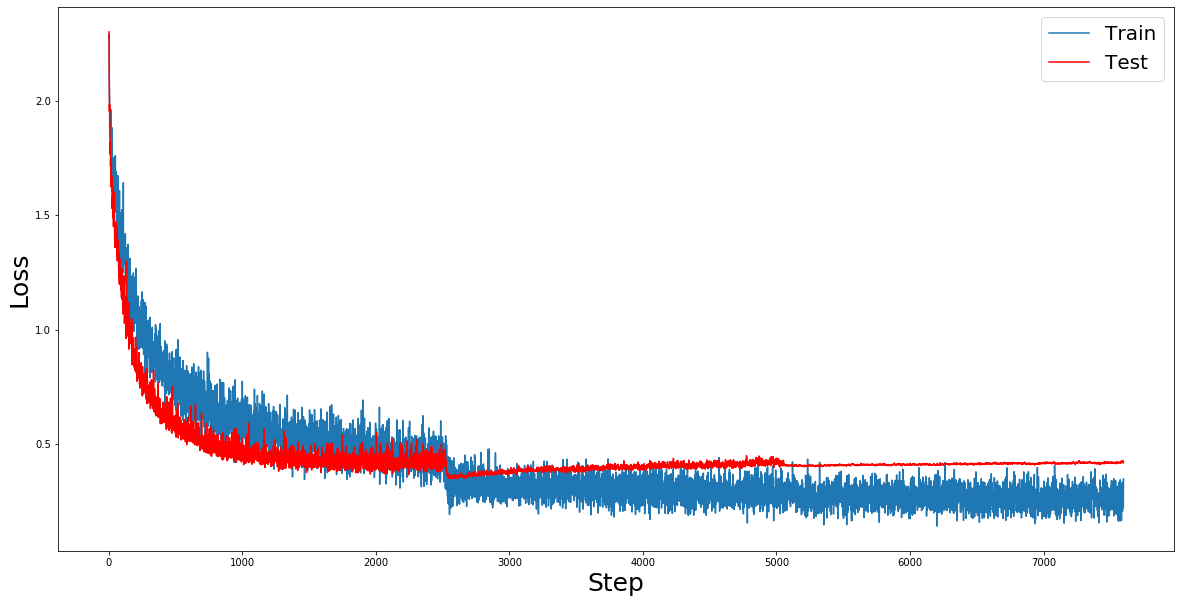

In [10]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(vgg.train_losses, label='Train')
test_lossline, = plt.plot(vgg.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

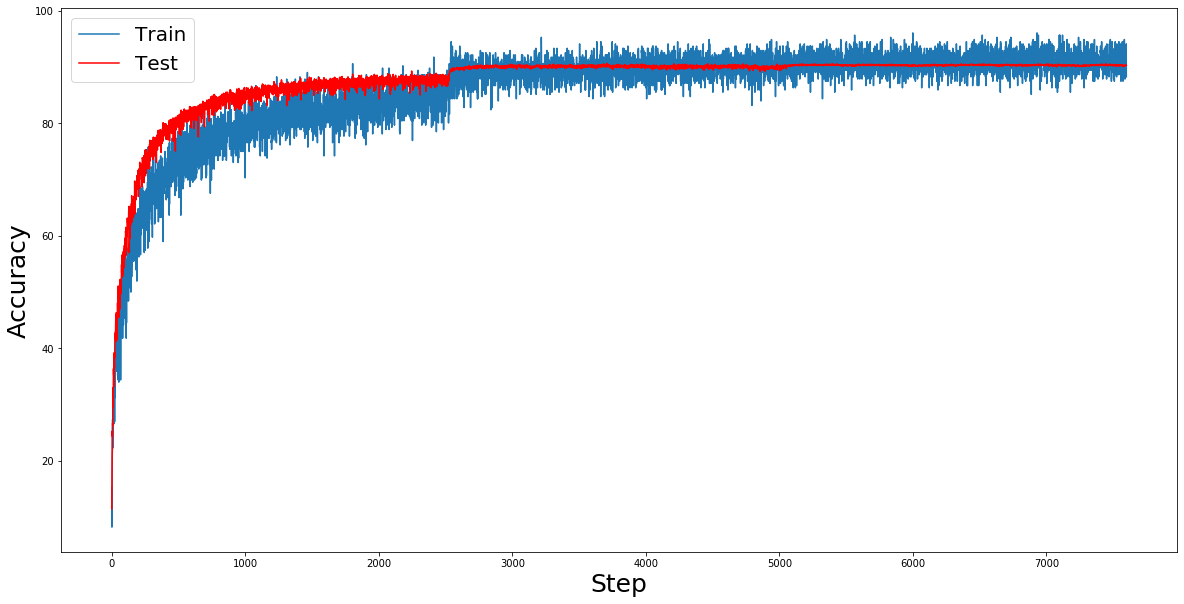

In [11]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(vgg.train_acc, label='Train')
test_accline, = plt.plot(vgg.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)
plt.show()